In [0]:
import pandas as pd
import numpy as np


In [55]:
url = 'https://raw.githubusercontent.com/salma71/MSDS_SU2020/master/Recommender_system612/week_1/ratings.csv'
movie = pd.read_csv(url)
display(movie.head())

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [56]:
url_title = 'https://raw.githubusercontent.com/salma71/MSDS_SU2020/master/Recommender_system612/week_1/movies.csv'
title = pd.read_csv(url_title)
display(title.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
df = pd.merge(movie, title, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


Let’s look at what each column represents:

*   userId: the ID of the user who rated the movie.
*   itemId: the ID of the movie.
* rating - The rating the user gave the movie, between 1 and 5.
* timestamp - The time the movie was rated.
* title - The title of the movie.

In [38]:
ratings = pd.DataFrame(df.groupby('item_id')['rating'].mean())
display(ratings.head())

,rating
item_id,
6454,3.818182
7443,3.772502
11960,4.033958
16411,3.668254
21296,4.171760


In [39]:
ratings['number_of_ratings'] = df.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
6454,3.818182,66
7443,3.772502,1011
11960,4.033958,854
16411,3.668254,1260
21296,4.171760,1636


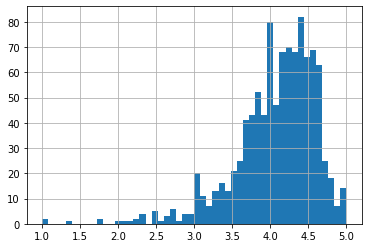

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

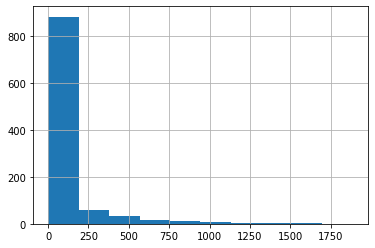

In [44]:
ratings['number_of_ratings'].hist(bins=10)

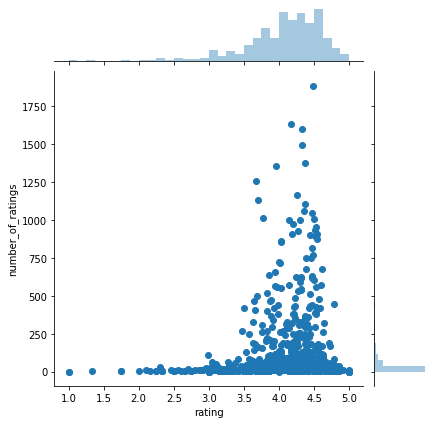

In [45]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

Let’s now move on swiftly and create a simple item based recommender system. In order to do this we need to convert our dataset into a matrix with the item_id as the columns, the user_id as the index and the ratings as the values. By doing this we shall get a dataframe with the columns as the item_id and the rows as the user ids. Each column represents all the ratings of an item by all users. The rating appear as NAN where a user didn't rate a certain item. We shall use this matrix to compute the correlation between the ratings of a single item and the rest of the items in the matrix. We use pandas pivot_table utility to create the item matrix.

In [50]:
item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating')
item_matrix.head()

item_id,6454,7443,11960,16411,21296,22563,24853,27439,27590,28252,28967,31644,31752,32134,32236,32403,32405,32406,34931,34935,34937,35272,35525,36172,36408,40141,40899,44261,44893,47325,47397,47657,48629,49525,49587,50405,50818,52406,54062,54222,...,154473,154505,154518,154537,154538,154540,154541,154543,154546,154555,154567,154568,154661,154663,154665,154667,154668,154693,154748,154749,154762,154794,154797,154855,154913,154927,154928,154934,154943,154947,155090,155165,155293,155305,155307,155308,155317,155537,155597,155950
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""Ferrari"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Chelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tree',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next let’s look at the most rated items and choose two of them to work with in this simple recommender system. We use pandas sort_values utility and set ascending to false in order to arrange the items from the most rated. We then use the head() function to view the top 10.

In [51]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
item_id,,
34935,4.482247,1887
21296,4.171760,1636
32405,4.325829,1599
32406,4.328648,1494
32403,4.367199,1378
67507,3.963154,1357
16411,3.668254,1260
55967,4.260309,1164
57369,3.701677,1133
